
# 📊 Analyse de votre réseau LinkedIn avec NetworkX

Ce notebook lit votre fichier LinkedIn Connections.csv et crée un graphe avec vous au centre et des liens entre vos contacts lorsqu'ils travaillent dans la même entreprise.  
Il calcule également le coefficient de clustering moyen et enregistre le graphe au format GraphML.

📝 Pré-requis :  
- Python installé
- Jupyter Notebook ou Jupyter Lab
- Bibliothèques `pandas`, `networkx`, `matplotlib`

🚩 À modifier :  
- La ligne du chemin du fichier CSV pour indiquer où se trouve **votre fichier**.


In [30]:

import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt


In [44]:

# 📍 Modifiez la ligne ci-dessous pour indiquer le chemin complet de votre fichier Connections.csv
csv_path = "Connections.csv"

df = pd.read_csv(csv_path)
df.head()


First Name Last Name                                                URL  \
0       Marie    MOUSSA  https://www.linkedin.com/in/marie-moussa-25a10...   
1      Romain    Brunel  https://www.linkedin.com/in/romain-brunel-affiseo   
2    Juliette     Isoir   https://www.linkedin.com/in/juliette-i-a77450255   
3      Renaud    Ginier  https://www.linkedin.com/in/renaud-ginier-ba47...   
4  Dr Nicolas    Moirou          https://www.linkedin.com/in/nicolasmoirou   

  Email Address                   Company  \
0           NaN         Dassault Systèmes   
1           NaN                       NaN   
2           NaN  Paris School of Business   
3           NaN                    Onisep   
4           NaN                      MBDA   

                                           Position Connected On  
0                                  Cheffe de projet  08 Jul 2025  
1                                               NaN  08 Jul 2025  
2  Attachée de promotion à Paris School Of Business  07 Jul 2025  
3                                  Product Marketer  07 Jul 2025  
4                             Aerodynamics Engineer  06 Jul 2025

In [45]:

# On garde seulement le prénom, le nom et l'entreprise pour chaque contact
df = df[['First Name', 'Last Name', 'Company']].dropna(subset=['Company'])
df['Name'] = df['First Name'].str.strip() + " " + df['Last Name'].str.strip()
df.head()


First Name Last Name                   Company               Name
0       Marie    MOUSSA         Dassault Systèmes       Marie MOUSSA
2    Juliette     Isoir  Paris School of Business     Juliette Isoir
3      Renaud    Ginier                    Onisep      Renaud Ginier
4  Dr Nicolas    Moirou                      MBDA  Dr Nicolas Moirou
5         Léa  Kianpour                     ALTEN       Léa Kianpour

In [46]:

# Créer un graphe vide
G = nx.Graph()

# Ajouter les contacts comme nœuds
for _, row in df.iterrows():
    G.add_node(row['Name'], company=row['Company'])

# Ajouter des liens entre contacts d'une même entreprise
for company, group in df.groupby('Company'):
    people = group['Name'].tolist()
    for i in range(len(people)):
        for j in range(i + 1, len(people)):
            G.add_edge(people[i], people[j], company=company)


In [39]:
my_name = "Moi"  # ou votre prénom/nom
G.add_node(my_name, company="")  # votre entreprise

for person in df['Name']:
    G.add_edge(my_name, person)


In [40]:

nb_nodes = G.number_of_nodes()
nb_edges = G.number_of_edges()

print(f"🔷 Nombre de nœuds (sommets) : {nb_nodes}")
print(f"🔷 Nombre de liens (arêtes) : {nb_edges}")

clustering_coeff = nx.average_clustering(G)
print(f"✅ Coefficient de clustering moyen (y compris vous) : {clustering_coeff:.3f}")


🔷 Nombre de nœuds (sommets) : 19112
🔷 Nombre de liens (arêtes) : 110213
✅ Coefficient de clustering moyen (y compris vous) : 0.360


In [43]:

output_path = "linkedin_connections_with_me.graphml"
nx.write_graphml(G, output_path)
print(f"🎉 Graphe sauvegardé sous : '{output_path}'")


🎉 Graphe sauvegardé sous : 'linkedin_connections_with_me.graphml'



---

### 🎯 Résumé

Votre graphe a été créé avec :
- Un nœud pour vous
- Un nœud pour chacun de vos contacts
- Des liens entre vous et chacun de vos contacts
- Des liens supplémentaires entre contacts travaillant dans la même entreprise

Le fichier `.graphml` peut être ouvert dans Gephi pour visualiser votre réseau.

---



## 📈 Visualisation et analyse du réseau

Dans cette section, nous allons visualiser le graphe et calculer quelques indicateurs clés.

Nous utilisons ici Python pour explorer votre réseau, mais vous pouvez également exporter le fichier `.graphml` et l’ouvrir dans Gephi pour des visualisations plus riches.

Nous allons appliquer un algorithme de positionnement, ajuster la taille et la couleur des nœuds selon des métriques, puis calculer les indicateurs suivants :

- Nombre de nœuds
- Nombre de liens
- Densité du graphe
- Coefficient de clustering moyen
- (Optionnel) Nombre de communautés (clusters)


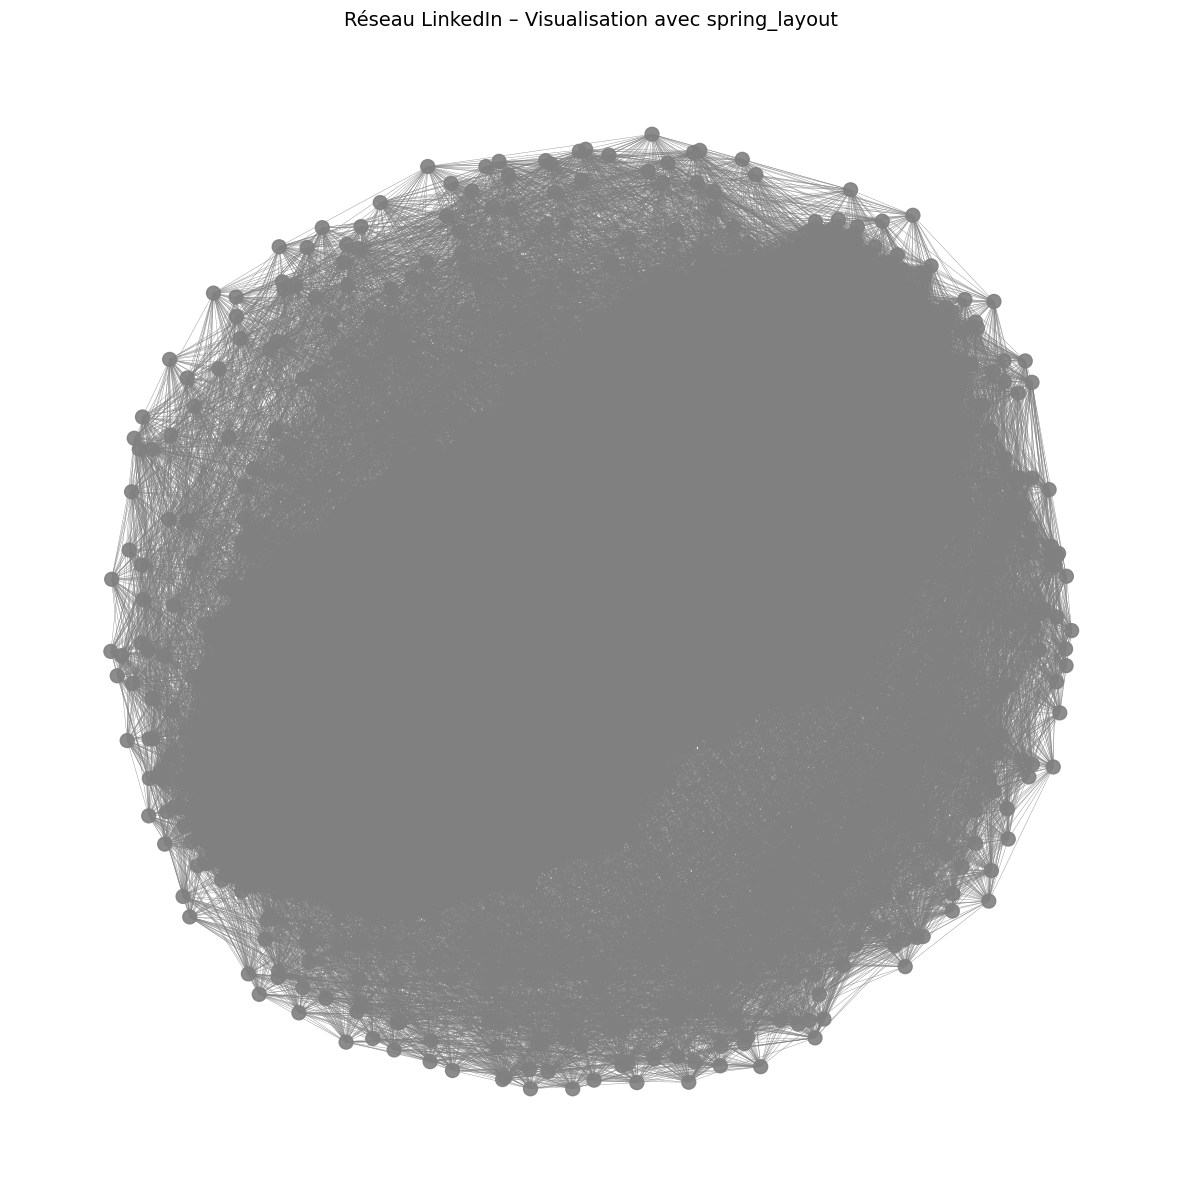

In [42]:
import matplotlib.pyplot as plt
import networkx as nx

# ⚙️ Créer un sous-graphe avec uniquement les nœuds dont le degré est ≥ 15
min_degree = 50
G_core = G.subgraph([n for n in G.nodes() if G.degree(n) >= min_degree])

# 💡 Calcul du layout
pos = nx.spring_layout(G_core, seed=42, k=1.5)

# 📏 Taille des nœuds plafonnée
degrees = dict(G_core.degree())
max_degree = 20
scale = 5
node_sizes = [min(v, max_degree) * scale for v in degrees.values()]

# Dessin du graphe
plt.figure(figsize=(15, 15))

nx.draw_networkx_nodes(
    G_core,
    pos,
    node_size=node_sizes,
    node_color='grey',
    alpha=0.9
)

nx.draw_networkx_edges(
    G_core,
    pos,
    edge_color='grey',
    width=0.3,
    alpha=0.9
)

plt.title("Réseau LinkedIn – Visualisation avec spring_layout", fontsize=14)
plt.axis('off')
plt.show()

In [14]:

# Calculer les indicateurs
nb_nodes = G.number_of_nodes()
nb_edges = G.number_of_edges()
density = nx.density(G)
clustering_coeff = nx.average_clustering(G)

print(f"Nombre de nœuds : {nb_nodes}")
print(f"Nombre de liens : {nb_edges}")
print(f"Densité du graphe : {density:.3f}")
print(f"Coefficient de clustering moyen : {clustering_coeff:.3f}")


Nombre de nœuds : 19112
Nombre de liens : 110213
Densité du graphe : 0.001
Coefficient de clustering moyen : 0.360



---

### 📊 Résultats à reporter :

| Indicateur                        | Valeur           |
|-----------------------------------|------------------|
| **Nombre de nœuds**              | ___________ |
| **Nombre de liens**              | ___________ |
| **Densité**                      | ___________ |
| **Coefficient de clustering**    | ___________ |
| **Nombre de clusters (optionnel)** | ___________ |

> 💡 Quelle interprétation donnez-vous à ces chiffres ? Votre réseau est-il plutôt homogène et soudé, ou fragmenté et dispersé ?

---

### 🔄 Analyse comparative

Comparez vos indicateurs avec ceux de vos collègues. Placez vos coefficients de clustering dans ce repère :

```
0               0.5               1
|---------------|----------------|
```
Qui a le coefficient de clustering le plus faible, le plus élevé ? Cela correspond-il à un rôle spécifique, par exemple de manager, de coordinateur ou de spécialiste isolé ?

Enfin, identifiez des axes d’amélioration possibles pour votre réseau professionnel en fonction de vos objectifs futurs et de votre capital social actuel.  
Regardez également quels secteurs d’activité ou quelles entreprises sont les plus représentés et lesquels pourraient être renforcés.
